# **Deep Learning**

## **Tarea 2**

### **Jorge David Martínez Cervantes**

### **CentroGeo**

### **19 de mayo del 2021**

# **1 Linear Algebra**

Using the linear algebra book of your choice. Prove the following statements

  1. Show that if a matrix $A \in \mathbb{R}^{n \times n}$ satisfies $A^2 = 4I_n$, then all eigenvalues of $A$ are 2 and -2.

  A partir de la definición de eigenvalores y eigenvectores (Charu, 2020: 103):

  $$A\textbf{x} = \lambda\textbf{x}$$

  podemos representar la expresión anterior como

  $$A^2\textbf{x} = 4I\textbf{x},$$

  siendo $A = A^2$ y $\lambda = 4I$. Si pasamos todos los términos al primer miembro de la ecuación obtendremos

  $$A^2\textbf{x} - 4I\textbf{x} = 0,$$

  y aplicamos la propiedad asociativa a la ecuación anterior para factorizar el vector $\textbf{x}$; de esta forma obtenemos
  
  $$(A^2 - 4I)\textbf{x} = 0.$$

  La ecuación anterior la podemos descomponer en binomios conjugados para obtener la expresión
  
  $$(A+2I)(A-2I)\textbf{x} = 0$$

  Y al encontrar las raíces de la expresión anterior, tenemos que los eigenvalores son -2 y 2.

  2. Let $A$, $B$ $\in \mathbb{R}^{n \times n}$. Proof that the matrix $AB-BA$ can never be positive semidefinite unless it is the zero matrix.



  3. If a matrix $P \in \mathbb{R}^{n \times n}$ satisfies $P^2 = P$, then all its eigenvalues must be 1 or 0.

  Parecido al ejercicio 1.1 podemos representar la matriz como

  $$P\textbf{x} = \lambda\textbf{x}.$$

  Si reacomodamos los términos
  
  $$P\textbf{x} - I\textbf{x} = 0$$

  y factorizamos, obtenemos

  $$(P-1)\textbf{x} = 0.$$

  De donde obtenemos que el eigenvalor de la ecuación anterior debe ser 1.


  4. The columns of the matrix $A \in \mathbb{R}^{n \times d}$ are linearly independent if and only if $c(x) = Ax$ is one-to-one function.

# **2 Write a code**

Using the deep learning library of your choice, solve the following:

  1. The second difference matrix $A \in \mathbb{R}^{n \times n}$ arises in approximating the second derivative on equally spaced data. The formula is:

  $$A_{i,j} =  \Bigg\{ \begin{array}{rcl} -2 & \textrm{if} & j=i  \\ 
  1 & \textrm{if} &  |j-1| = 1 \\ 
  0 & \textrm{if} & |j-1| > 1 \end{array}$$

  Write a code that allows you to create this matrix for a given $n$ and find in the literature the characteristics of this matrix. Then, solve a system of equations $A\textbf{x} = \textbf{b}$ by :

    (a) Calculating the inverse directly.

    (b) Employing a numeric strategy for this particular form of matrices.

    (c) Create a graphs of computational time and memory cost.

In [1]:
!pip install line_profiler
!pip install memory_profiler

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
# Create a matrix
import numpy as np
import tensorflow as tf
from numpy.random import randint as rn

def tridiag_matrix(n):
    A = tf.linalg.LinearOperatorTridiag([[1. for _ in range(n)],
                                          [-2. for _ in range(n)],
                                          [1. for _ in range(n)]])
    B = [float(x) for x in list(rn(-9,9, int(n)))]
    D = tf.constant([[1. for _ in range(n)],
                     [-2. for _ in range(n)],
                     [1. for _ in range(n)]], dtype=tf.float32)
 
    return A, tf.constant(B, shape = (int(n),1)), D

In [8]:
n = 1000000

my_matrix, vector_sol, diags = tridiag_matrix(n)

Defino ahora las diagonales de mi matriz y mi vector solución

## (a) Calculating the inverse directly

Para realizar esto utilizo la función `inv` de la librería de `TensorFlow.linalg`.

In [12]:
def solve_with_inverse(matrix, solution_vector):
  inverse = tf.linalg.inv(matrix)
  solution = tf.matmul(a = inverse, b = vector_sol).numpy()
  return solution

fun_time_a = %timeit -o solucion_a = solve_with_inverse(my_matrix, vector_sol)
fun_cpu_a = %memit -o solve_with_inverse(my_matrix, vector_sol)
#print(solucion_a)

print(np.mean(fun_time_a.all_runs))
print(fun_cpu_a)

10 loops, best of 5: 26.8 ms per loop
peak memory: 1360.91 MiB, increment: 0.00 MiB
0.2750140621996252
peak memory: 1360.91 MiB, increment: 0.00 MiB


## (b) Employing a numeric strategy for this particular form of matrices.

Para realizar esto voy a usar la función `tridiagonal_solve` de la librería `TensorFlow.linalg`

In [13]:
def solve_with_tfmethod(diagonals, solution_vector):
  solution = tf.linalg.tridiagonal_solve(diagonals=diags, rhs=solution_vector)
  
  return solution
  
fun_time_b = %timeit -o solucion_b = solve_with_tfmethod(diags, vector_sol)
fun_cpu_b = %memit -o solucion_b = solve_with_tfmethod(diags, vector_sol)
print(solucion_b)

print(np.mean(fun_time_b.all_runs))

10 loops, best of 5: 21.4 ms per loop
peak memory: 1360.91 MiB, increment: 0.00 MiB
tf.Tensor(
[[2388.626 ]
 [4773.252 ]
 [7163.878 ]
 ...
 [5175.385 ]
 [3445.9229]
 [1723.4614]], shape=(1000000, 1), dtype=float32)
0.21682145740051056


<BarContainer object of 2 artists>

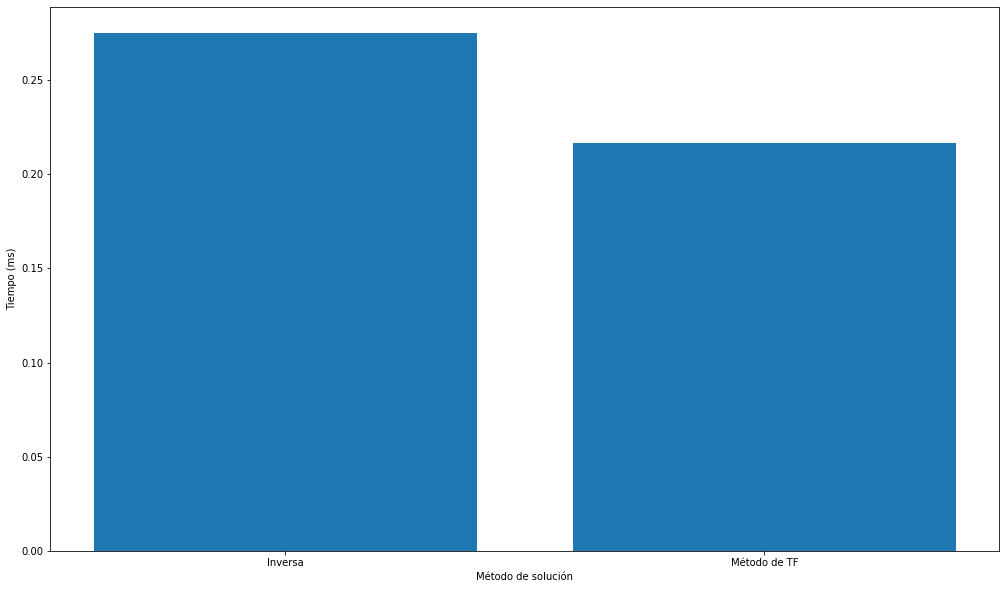

In [14]:
langs = ["Inversa", "Método de TF"]
barras = [np.mean(fun_time_a.all_runs), np.mean(fun_time_b.all_runs)]

import matplotlib.pyplot as plt

plt.figure(figsize=(17, 10))
plt.ylabel("Tiempo (ms)")
plt.xlabel("Método de solución")
plt.bar(langs, barras)

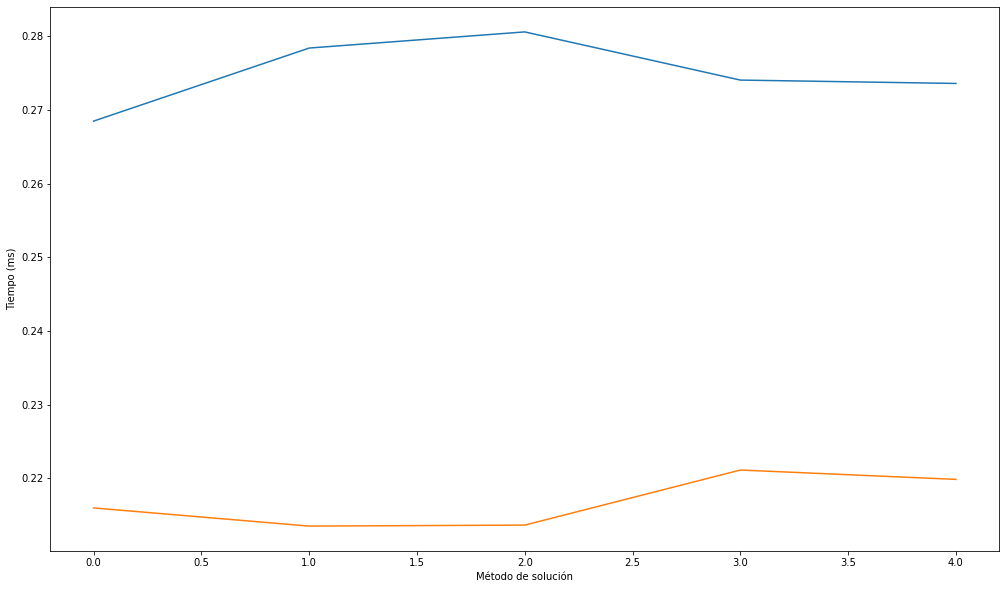

In [15]:
plt.figure(figsize=(17, 10))
plt.ylabel("Tiempo (ms)")
plt.xlabel("Método de solución")
plt.plot(fun_time_a.all_runs)
plt.plot(fun_time_b.all_runs)

In [ ]:
%mprun -T mprof0 solve_with_inverse(my_matrix, vector_sol)